### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

For many incumbent operators, retaining high profitable customers is the top business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Recharging of the service: There are several variables that describe the duration, maximum, total amount and average of the recharge price of the service they avail, which include the 2G service, the 3G service, internet packages and call services
  - av_rech_amt_data: Average recharge data amount
  - count_rech_2g: Number of customers using 2G
  - count_rech_3g: Number of customers using 3G
  - max_rech_data: Maximum recharge for mobile internet
  - total_rech_data: Total recharge for mobile internet
  - max_rech_amt: Maximum recharge amount
  - total_rech_amt: Total recharge amount
  - total_rech_num: Total number of times customer recharged

If there are missing values in the columns corresponding to these variables, this is because the customer did not recharge that month.


# Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [2]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Let's take only first 10000 rows for the rest of the analysis for the ease of computation
churn_data = pd.read_csv('/content/drive/MyDrive/Telecom Churned Dataset/Dataset/telecom_churn_data.csv')

Mounted at /content/drive


# Task 2: Understanding and exploring the data

In [3]:
# Look at the first five rows
churn_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252

In [4]:
# Look at the last five rows 
churn_data.tail()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,93.09,72.88,160.83,

In [5]:
# Summary of different features types
churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    last_date_of_month_9      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   arpu_9                    float64
 12   onnet_mou_6               float64
 13   onnet_mou_7               float64
 14   onnet_mou_8               float64
 15   onnet_mou_9               float64
 16   offnet_mou_6              float64
 17   offnet_mou_7              float64
 18   offnet_mou_8              float64
 19   offnet_mou_9              float64
 20   roam

In [6]:
# Analysis of data statistics
churn_data.describe(include='all')

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0000

In [7]:
# Create backup of data
churn = churn_data.copy()

In [8]:
# Create column name list by types of columns
id_cols = ['circle_id']

# Date Columns
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
             ]

# Category columns
cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'night_pck_user_9',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
            'fb_user_9'
            ]

num_cols = [column for column in churn_data.columns if column not in id_cols + date_cols + cat_cols]

# Print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# Check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn_data.shape[1])

#ID cols: 1
#Date cols:12
#Numeric cols:204
#Category cols:8
True


# Handling missing values

In [9]:
# Look at missing value ratio in each columns
for column in churn_data.columns:
  print(f'{column} : {sum(churn_data[column].isnull())*100/len(churn_data[column])}')

circle_id : 0.0
loc_og_t2o_mou : 1.018010180101801
std_og_t2o_mou : 1.018010180101801
loc_ic_t2o_mou : 1.018010180101801
last_date_of_month_6 : 0.0
last_date_of_month_7 : 0.6010060100601006
last_date_of_month_8 : 1.1000110001100012
last_date_of_month_9 : 1.6590165901659017
arpu_6 : 0.0
arpu_7 : 0.0
arpu_8 : 0.0
arpu_9 : 0.0
onnet_mou_6 : 3.937039370393704
onnet_mou_7 : 3.8590385903859037
onnet_mou_8 : 5.3780537805378055
onnet_mou_9 : 7.745077450774508
offnet_mou_6 : 3.937039370393704
offnet_mou_7 : 3.8590385903859037
offnet_mou_8 : 5.3780537805378055
offnet_mou_9 : 7.745077450774508
roam_ic_mou_6 : 3.937039370393704
roam_ic_mou_7 : 3.8590385903859037
roam_ic_mou_8 : 5.3780537805378055
roam_ic_mou_9 : 7.745077450774508
roam_og_mou_6 : 3.937039370393704
roam_og_mou_7 : 3.8590385903859037
roam_og_mou_8 : 5.3780537805378055
roam_og_mou_9 : 7.745077450774508
loc_og_t2t_mou_6 : 3.937039370393704
loc_og_t2t_mou_7 : 3.8590385903859037
loc_og_t2t_mou_8 : 5.3780537805378055
loc_og_t2t_mou_9 : 7.

# (i)Imputing missing values with zeros
There are lot of missing values avaiable in the each column, we will go ahead and perform some imputing and deleting.

We will start with the columns responding to the "Recharging of the service" information


In [10]:
# Some recharge columns have minimum values of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn_data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [11]:
# Observe whether the date of the last recharge and the total recharge data value are missing together
# You can do this by displaying the rows that have null values in these two variables

last_rech_cols = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
                  'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']

churn_data[last_rech_cols].isnull().sum()

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
dtype: int64

In the recharge variable, we see that the minimum value is 1, we can impute missing values with zeros since it means customer didn't recharge their number that month.

In [12]:
# Creating a list of recharge columns where we will impute missing values with zeros
zeros_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                ]

In [13]:
# imputing missing values with 0 for the above mentioned list of recharge columns

for col in zeros_impute:
  churn_data[col].fillna(0, inplace=True)

In [14]:
# Let's make sure values are imputed correctly
print("Missing values ratio: \n")
print(churn_data[zeros_impute].isnull().sum()*100/churn_data.shape[1])

# Summary
print("\n\nSummary Statistics\n")
print(churn_data[zeros_impute].describe(include='all'))

Missing values ratio: 

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary Statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rec

In [15]:
# Drop id and all the date columns
print("Shape before dropping: ", churn_data.shape)

drop_cols = [id_cols + date_cols]
for column in drop_cols:
  churn_data.drop(column, inplace=True, axis=1)

print("Shape after dropping: ", churn_data.shape)

Shape before dropping:  (99999, 225)
Shape after dropping:  (99999, 212)


# (ii) Replace NaN values in the categorical variables

Replacing missing values in the categorical variables with "-1" where "-1" will be new category

In [16]:
# Check the missing values ratio in the categorical variables
churn_data[cat_cols].isnull().sum()*100/churn_data.shape[1]

night_pck_user_6    35304.716981
night_pck_user_7    35107.547170
night_pck_user_8    34745.283019
night_pck_user_9    34941.981132
fb_user_6           35304.716981
fb_user_7           35107.547170
fb_user_8           34745.283019
fb_user_9           34941.981132
dtype: float64

In [17]:
# Replace missing value with '-1' in categorical variables
for cat in cat_cols:
  churn_data[cat].fillna(-1, inplace=True)

In [18]:
# Re-check the missing values ratio
print("Missing values ratio:\n")
print(churn_data[cat_cols].isnull().sum()*100/churn_data.shape[1])

Missing values ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


# (iii) Drop variables with more than a given threshold of missing values

Here, we will be removing the column variables that have more than 70% of its elements missing

In [19]:
initial_cols = churn_data.shape[1]

# Insert the threshold value of missing entries
MISSING_threshold = 70
threshold = []

# Extract a list of columns that have less than the threshold of missing values
for column in churn_data.columns:
  if sum(churn_data[column].isnull())*100/len(churn_data[column]) < 70:
    threshold.append(column)

In [20]:
# Include columns extracted in the above list in the main dataset
# These columns will have the percentage of missing values less than the threshold
for column in churn_data.columns:
  if column not in threshold:
    churn_data.drop(column, axis=1, inplace=True)

# Display the number of columns dropped
len(churn.columns) - len(churn_data.columns)

29

In [21]:
# Look at the missing value ratio in each column
churn_data.isnull().sum()*100/churn_data.shape[0]

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

# (iv) Impute missing values using MICE

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

We will be using the Linear Regression for filling the missing values in the rest of the numeric columns

In [23]:
churn_cols = churn_data.columns

# Using MICE technique to impute missing values in the rest of the columns
lr = LinearRegression()

# Implement the Iterative Imputer technique to impute appropriate values in the missing entries of the rest of the numeric columns
imp = IterativeImputer(estimator = lr,
                       missing_values = np.nan,
                       max_iter = 1,
                       verbose = 2,
                       imputation_order = 'roman',
                       random_state=0)

# Transform the data
churn_data = imp.fit_transform(churn_data)

[IterativeImputer] Completing matrix with shape (99999, 196)
[IterativeImputer] Ending imputation round 1/1, elapsed time 327.23
[IterativeImputer] Change: 242798.34844752384, scaled tolerance: 45.735400000000006 


In [24]:
# Convert imputed numpy array to pandas dataframe
churn_data = pd.DataFrame(churn_data, columns=churn_cols)
print(churn_data.isnull().sum() * 100/churn_data.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

We see that we have removed or filled missing values from the dataset. We will now proceed to feature engineering to further prepare the data for testing machine learning models and deep learning models

# Task 3:- Feature Engineering

Filter high-value customers

Calculate total data recharge amount 

In [25]:
# Calculate and store the total data recharge amount for June --> number of data recharges * average data recharge amount
# You have to use the total recharge for data and the average recharge amount for data
churn_data['total_data_rech_amt_6'] = churn_data['total_rech_num_6'] * churn_data['av_rech_amt_data_6']

# Calculate and store the total data recharge amount for July --> number of data recharges * average data recharge amount
churn_data['total_data_rech_amt_7'] = churn_data['total_rech_num_7'] * churn_data['av_rech_amt_data_7']

### Add total data recharge and total recharge to get total combined recharge amount for a month

In [26]:
# calculate and store total recharge amount for call and internet data for June --> total call recharge amount + total data recharge amount
churn_data['total_recharge_amt_6'] = churn_data['total_rech_amt_6'] + churn_data['total_data_rech_amt_6']

# calculate and store total recharge amount for call and internet data for July --> total call recharge amount + total data recharge amount
churn_data['total_recharge_amt_7'] = churn_data['total_rech_amt_7'] + churn_data['total_data_rech_amt_7']

In [27]:
# calculate average data recharge amount done by customer in June and July
avg_rech_data = []

for i in range(0, 99999):
  a = (churn_data['total_data_rech_amt_6'][i] + churn_data['total_data_rech_amt_7'][i]) / 2
  avg_rech_data.append(a)

In [28]:
churn_data['avg_rech_data'] = avg_rech_data

In [29]:
# evaluate and display the 70th percentile average data recharge amount of June and July

avg_data_percent = np.percentile(churn_data['avg_rech_data'], 70)
print(avg_data_percent)

102.0


In [30]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
# You have to see whether each customer row has the average data recharge amount more than the 70th percentile of the average data recharge amount

retain_customers = (churn_data['avg_rech_data'] >= avg_data_percent)
churn_data = churn_data[retain_customers]

In [31]:
# delete variables created to filter high-value customers
churn_data.drop(churn_data.iloc[:, -5:], axis=1, inplace=True)

In [32]:
# Display the number of customers retained in the data set
print("There are",churn_data.shape[0], "customers")

There are 30038 customers


## Derive Churn

In [33]:
# calculate total incoming and outgoing minutes of usage for the month of September
churn_data['total_call_usage_9'] = churn_data['total_og_mou_9'] + churn_data['total_ic_mou_9'] 

churn_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_call_usage_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-1632.701045,2560.146865,0.00,4676.889687,-953.241189,123.988246,0.00,979.673208,40467.334859,45369.889264,0.0,53184.426409,1250.593357,2760.079309,0.0,1737.698082,40.515091,27.758264,0.00,29.701712,92.101799,90.25919,0.00,90.35231,3.685689,3.749523,0.0,3.654604,-6685.375052,-7829.443045,0.00,-10340.736929,10.467919,-14.606917,0.00,-17.339163,90.20217,93.185894,0.00,92.04229,87.920876,91.303689,0.00,86.284026,1.148555,1.127912,0.0,1.10457,0.0,0.0,0.0,0.0,121.681391,126.724545,0.00,122.492241,-115.980239,-102.010449,0.0,-100.509952,-3.855625,-0.516755,0.00,3.876311,0.124407,-0.158606,0.0,0.024023,0.00,0.00,0.00,0.00,52.901143,46.495706,0.16,52.536222,107.265931,106.966626,4.13,106.142227,12.07264,12.61078,1.15,12.156169,70.298076,61.006273,5.44,65.72886,23.168628,23.187309,0.00,24.225667,21.881149,22.693989,0.00,19.745164,2.230312,2.263879,0.0,2.177743,0.0,0.0,0.0,0.0,1.973895,1.783824,0.00,0.796245,0.00,0.00,5.44,0.00,-65.549388,-63.364772,0.0,-67.632823,1.703701,3.175227,0.00,7.337796,0.420866,0.77298,0.0,0.977941,4.0,3.0,2.0,6.0,362.0,252.0,252

In [34]:
# calculate the total volumn of 2g and 3g data consumption for the month of September
churn_data['total_data_usage_9'] = churn_data['vol_2g_mb_9'] + churn_data['vol_3g_mb_9']

churn_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_call_usage_9,total_data_usage_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-1632.701045,2560.146865,0.00,4676.889687,-953.241189,123.988246,0.00,979.673208,40467.334859,45369.889264,0.0,53184.426409,1250.593357,2760.079309,0.0,1737.698082,40.515091,27.758264,0.00,29.701712,92.101799,90.25919,0.00,90.35231,3.685689,3.749523,0.0,3.654604,-6685.375052,-7829.443045,0.00,-10340.736929,10.467919,-14.606917,0.00,-17.339163,90.20217,93.185894,0.00,92.04229,87.920876,91.303689,0.00,86.284026,1.148555,1.127912,0.0,1.10457,0.0,0.0,0.0,0.0,121.681391,126.724545,0.00,122.492241,-115.980239,-102.010449,0.0,-100.509952,-3.855625,-0.516755,0.00,3.876311,0.124407,-0.158606,0.0,0.024023,0.00,0.00,0.00,0.00,52.901143,46.495706,0.16,52.536222,107.265931,106.966626,4.13,106.142227,12.07264,12.61078,1.15,12.156169,70.298076,61.006273,5.44,65.72886,23.168628,23.187309,0.00,24.225667,21.881149,22.693989,0.00,19.745164,2.230312,2.263879,0.0,2.177743,0.0,0.0,0.0,0.0,1.973895,1.783824,0.00,0.796245,0.00,0.00,5.44,0.00,-65.549388,-63.364772,0.0,-67.632823,1.703701,3.175227,0.00,7.337796,0.420866,0.77298,0.0,0.977941,4.0,3.0,2.0,

In [35]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

churn_data['churn_customers'] = np.where((churn_data['total_call_usage_9'] ==0) | (churn_data['total_data_usage_9'] ==0) ,1, 0)

In [36]:
# Delete derived variables
churn_data.drop(churn_data.iloc[:, -3:-1], axis=1, inplace=True)

In [37]:
# change the 'churn' variable data type to 'category'
churn_data['churn_customers'] = churn_data['churn_customers'].astype('category')

# Display the churn ratio
print("The churn ratio is:\n",churn_data['churn_customers'].value_counts()*100/len(churn_data['churn_customers']))

The churn ratio is:
 0    58.079766
1    41.920234
Name: churn_customers, dtype: float64


In [59]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Ratio of customers churn vs Ratio of customers not churn')

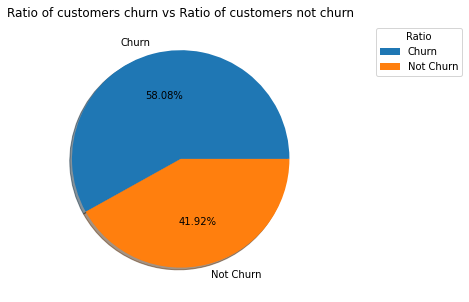

In [65]:
x = churn_data['churn_customers'].value_counts()*100/len(churn_data['churn_customers'])
# print(x)
plt.figure(figsize=(12, 5))
fig = plt.pie(data=churn_data, x = x, labels = ['Churn', 'Not Churn'],autopct='%1.2f%%',shadow=True, radius=1)
plt.title("Ratio of customers churn vs Ratio of customers not churn")
plt.legend(bbox_to_anchor = (1.20, 1), title='Ratio')
plt.show()

# Calculate difference between the month of August v/s month of June, July

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [ ]:
cols =  ['arpu',
         'onnet_mou',
         'offnet_mou',
         'roam_ic_mou',
         'roam_og_mou',
         'loc_og_mou',
         'std_og_mou',
         'isd_og_mou',
         'spl_og_mou',
         'total_og_mou',
         'loc_ic_mou',
         'std_ic_mou',
         'isd_ic_mou',
         'spl_ic_mou',
         'total_ic_mou',
         'total_rech_num',
         'total_rech_amt',
         'max_rech_amt',
         'total_rech_data',
         'max_rech_data',
         'av_rech_amt_data',
         'vol_2g_mb',
         'vol_3g_mb'
         ]

# Create new columns that hold the value of the difference between the variable value 
# in the month of August and average of the variable values in the month of June and July
for i in cols:
  churn_data[i +'_diff'] = (churn_data[i+'_8']) - ((churn_data[i+'_6'] + churn_data[i+'_7']) / 2)

In [ ]:
# let's look at summary of one of the difference variables
# The variable mentioned below is the total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July

churn_data['total_og_mou_diff'].describe()

In [ ]:
# Create a copy of data
churned = churn_data.copy()
churned.head()

### Delete columns that belong to the churn month (9th month)

In [ ]:
def split(word):
    return list(word)

In [ ]:
# Delete all variables relating to 9th month
for i in churn_data.columns:
  if '9' in split(i):
    churn_data.drop(i,axis=1,inplace=True)

In [ ]:
churn_data.shape

In [ ]:
# update num_cols and cat_cols column name list
# extract all names that end with 9
name_with_9 = []
for name in num_cols:
  if '9' in [*name]:
    name_with_9.append(name)

for name_1 in cat_cols:
  if '9' in [*name_1]:
    name_with_9.append(name_1)

# update num_cols so that all the variables related to the month of September are removed

for name_2 in num_cols:
    if '9' in [*name_2]:
      num_cols.remove(name_2)

# update cat_cols so that all the variables related to the month of September are removed

for name_3 in cat_cols:
  if '9' in [*name_3]:
    cat_cols.remove(name_3)

# Task 4: Data Visualization

In [ ]:
# ensure that all the numerical and categorical columns are of the correct data types
for col in cat_cols:
  churn_data[col] = pd.Categorical(churn_data[col])

In [ ]:
churn_data.info(verbose=1)

In [ ]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

# Univariate EDA

In [ ]:
# Plot the average revenue per user in June

univariate(churn_data['arpu_6'])

In [ ]:
# Plot the minutes of usage of local (within same telecom circle) outgoing calls of Operator T to other operator fixed line

univariate(churn_data['loc_og_t2o_mou'])

In [ ]:
# Plot the minutes of usage of STD (outside the calling circle) outgoing calls of Operator T to other operator fixed line

univariate(churn_data['std_og_t2o_mou'])

In [ ]:
# Plot the minutes of usage of all kind of calls within the same operator network for the month of August

univariate(churn_data['onnet_mou_8'])

In [ ]:
# Plot the minutes of usage of all kind of calls outside the operator T network for the month of September

univariate(churned['offnet_mou_9'])

# Bivariate EDA

In [ ]:
# Plot the relationship between whether the customer churned or not and the age on network (number of days the customer is using the operator T network)
bivariate(churn_data['churn_customers'], churn_data['aon'])

In [ ]:
# Plot the relationship between the 3G volume based cost in Sept (when no specific scheme is not purchased and paid as per usage) and whether the customer churned or not

bivariate(churn_data['churn_customers'] ,churned['vol_3g_mb_9'])

In [ ]:
# Plot the relationship between the minutes of usage of special outgoing calls in the month of August and whether the customer churned or not
bivariate(churn_data['churn_customers'],churn_data['spl_og_mou_8'])

In [ ]:
# Plot the relationship between whether the customer churned or not and the night package used by users in August
pd.crosstab(churn_data['churn_customers'],churn_data['night_pck_user_8'], normalize='columns')*100

In [ ]:
# Plot the relationship between whether the customer churned or not and the 3G service schemes with validity smaller than a month for the month of August
pd.crosstab(churn_data['churn_customers'] ,churn_data['monthly_3g_8'] < churn_data['sachet_3g_8'],normalize='columns')

# Task 5: Outlier Treatment


### Cap outliers in all numeric variables

In [ ]:
# function for capping outliers
def cap_outliers(array):

    # Get the 75% quantile of the array
    # Get the 25% quantile of the array
    # Get the interquartile range (IQR) (q3 - q1)

    q3 = np.quantile(array, 0.75)
    q1 = np.quantile(array, 0.25)
    IQR = q3-q1


    # Calculate the upper limit - 75% quartile + 1.5*IQR
    # Calculate the lower limit - 25% quartile - 1.5*IQR

    upper_limit = q3 + 1.5*IQR
    lower_limit = q1 - 1.5*IQR


    # Perform outlier capping
    # Set all the values in the array above the upper limit to be equal to the upper limit
    # Set all the values in the array below the lower limit to be equal to the lower limit

    array = np.where(array > upper_limit, upper_limit,
                        np.where(array < lower_limit, lower_limit,
                        array))

    return array

In [ ]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array))

In [ ]:
# cap outliers in all the numeric columns using your outlier capping function
a = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
     'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']
for col in num_cols:
  if col not in a:
    cap_outliers(churn[col])

# Task 6: Modeling

## i) Importing necessary libraries for machine learning and deep learning

In [ ]:
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#modules for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve

# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import RMSprop
from keras.losses import binary_crossentropy

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import RMSprop
# from keras.losses import binary_crossentropy

## ii) Preprocessing data

In [ ]:
# Change churn to numeric
churn_data['churn_customers'] = pd.to_numeric(churn_data['churn_customers'])

## (iii)Train-test Split

In [ ]:
# Extract input and output data
y = churn_data['churn_customers']
X = churn_data.drop('churn_customers', axis=1)

In [ ]:
# Use dummy variables for categorical variables
X1 = pd.get_dummies(X, drop_first = True) ## For Logistic Regression
X2 = pd.get_dummies(X, drop_first = False) ## For Tree, knn

In [ ]:
# divide data into train and test
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.25, random_state=4)

# print shapes of train and test sets
X1_train.shape
X2_train.shape
y_train.shape
X1_test.shape
X2_test.shape
y_test.shape

In [ ]:
X_new = X.to_numpy()
# Train-test split using stratified k fold
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=None)
skf.get_n_splits(X_new, y)

print(skf)
for train_index, test_index in skf.split(X_new, y):
  X_train, X_test = X_new[train_index], X_new[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

print('\n')
y1_train.value_counts()

## Random Under-Sampling

In [ ]:
# random under sampling using imblearn
# Use the RandomUnderSampler (RUS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y1_train)

y_rus.value_counts()

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=1, stratify=y_rus)
y_train_rus.value_counts()

## Random Over-Sampling

In [ ]:
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X_train, y1_train)

y_ros.value_counts()

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1, stratify=y_ros)
y_train_ros.value_counts()

Testing different machine learning models over the three data sets, namely, the original cleaned data set, the under-sampled data set and the over-sampled data set.

# Logistic Regression

In [ ]:
# Defining the logistic regression model and fit it on the normal X_train and y_train
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Logistic Regression - without balancing'

log_reg = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, max_iter=100)
log_reg.fit(X1_train, y_train)

# Evaluating the accuracy of the training and validation sets
y_train_pred_log = log_reg.predict(X1_train)
y_test_pred_log = log_reg.predict(X1_test)

log_train_acc = accuracy_score(y_train_pred_log, y_train)
log_val_acc = accuracy_score(y_test_pred_log, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test, y_test_pred_log)
precision = precision_score(y_test, y_test_pred_log)
recall = recall_score(y_test, y_test_pred_log,pos_label=1)

# creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, log_train_acc, log_val_acc, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])

In [ ]:
# Defining the logistic regression model and fit it on the random under sampled X_train_rus and y_train_rus
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Undersampling'

lr_reg_model = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, max_iter=100)
lr_reg_model.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
y_train_rus_pred = lr_reg_model.predict(X_train_rus)
y_test_rus_pred = lr_reg_model.predict(X_test_rus)

log_train_rus_acc = accuracy_score(y_train_rus_pred, y_train_rus)
log_val_rus_acc = accuracy_score(y_test_rus_pred, y_test_rus)


# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_rus, y_test_rus_pred)
precision = precision_score(y_test_rus, y_test_rus_pred)
recall = recall_score(y_test_rus, y_test_rus_pred, pos_label=1)


# adding calculations to dataframe
model_eval_data = [model_name, log_train_rus_acc, log_val_rus_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [ ]:
# Defining the logistic regression model and fit it on the random over sampled X_train_ros and y_train_ros
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Oversampling'

lr_reg_model_ros = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, max_iter=100)
lr_reg_model_ros.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets
y_train_ros_pred = lr_reg_model_ros.predict(X_train_ros)
y_test_ros_pred = lr_reg_model_ros.predict(X_test_ros)

log_train_ros_acc = accuracy_score(y_train_ros_pred, y_train_ros)
log_val_ros_acc = accuracy_score(y_test_ros_pred, y_test_ros)


# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_ros, y_test_ros_pred)
precision = precision_score(y_test_ros, y_test_ros_pred)
recall = recall_score(y_test_ros, y_test_ros_pred, pos_label=1)

# adding calculations to dataframe
model_eval_data = [model_name, log_train_ros_acc, log_val_ros_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

# Decision Tree

In [ ]:
# Defining the decision tree model and fit it on the normal X_train and y_train 
# 'max_depth' is set to 50
# 'random_state' is set to 0
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Decision Tree - without balancing'

tree_model = DecisionTreeClassifier(max_depth=50, random_state=0)
tree_model.fit(X2_train, y_train)

# Evaluating the accuracy of the training and validation sets
y_train_pred = tree_model.predict(X2_train)
y_test_pred = tree_model.predict(X2_test)

tree_train_acc = accuracy_score(y_train_pred, y_train)
tree_val_acc = accuracy_score(y_test_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_pred, y_test)
precision = precision_score(y_test_pred, y_test)
recall = recall_score(y_test_pred, y_test, pos_label = 1)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [ ]:
# Defining the decision tree model and fit it on the random under sampled X_train_rus and y_train_rus
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Undersampling'

tree_model = DecisionTreeClassifier(max_depth=50, random_state=0)
tree_model.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
y_train_pred_rus = tree_model.predict(X_train_rus)
y_test_pred_rus = tree_model.predict(X_test_rus)

tree_train_acc = accuracy_score(y_train_pred_rus, y_train_rus)
tree_val_acc = accuracy_score(y_test_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_pred_rus, y_test_rus)
precision = precision_score(y_test_pred_rus, y_test_rus)
recall = recall_score(y_test_pred_rus, y_test_rus, pos_label = 1)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [ ]:
# Defining the decision tree model and fit it on the random over sampled X_train_ros and y_train_ros
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Oversampling'

tree_model = DecisionTreeClassifier(max_depth=50, random_state=0)
tree_model.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets
y_train_pred_ros = tree_model.predict(X_train_ros)
y_test_pred_ros = tree_model.predict(X_test_ros)

tree_train_acc = accuracy_score(y_train_pred_ros, y_train_ros)
tree_val_acc = accuracy_score(y_test_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_pred_ros, y_test_ros)
precision = precision_score(y_test_pred_ros, y_test_ros)
recall = recall_score(y_test_pred_ros, y_test_ros, pos_label = 1)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

# kNN

In [ ]:
# Defining the kNN model and fit it on the normal X_train and y_train 
# 'n_neighbors' is set to 14
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'kNN - without balancing'

knn_model = KNeighborsClassifier(n_neighbors = 14)
knn_model.fit(X2_train, y_train)

# Evaluating the accuracy of the training and validation sets
y_train_pred = knn_model.predict(X2_train)
y_test_pred = knn_model.predict(X2_test)

knn_train_acc = accuracy_score(y_train_pred, y_train)
knn_val_acc = accuracy_score(y_test_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_pred, y_test)
precision = precision_score(y_test_pred, y_test)
recall = recall_score(y_test_pred, y_test, pos_label=1)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [ ]:
# Defining the kNN model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Undersampling'

knn_model_rus = KNeighborsClassifier(n_neighbors = 14)
knn_model.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
y_train_pred_rus = knn_model.predict(X_train_rus)
y_test_pred_rus = knn_model.predict(X_test_rus)

knn_train_acc = accuracy_score(y_train_pred_rus, y_train_rus)
knn_val_acc = accuracy_score(y_test_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_pred_rus, y_test_rus)
precision = precision_score(y_test_pred_rus, y_test_rus)
recall = recall_score(y_test_pred_rus, y_test_rus, pos_label=1)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [ ]:
# Defining the kNN model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Oversampling'

knn_model_ros = KNeighborsClassifier(n_neighbors = 14)
knn_model.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets
y_train_pred_ros = knn_model.predict(X_train_ros)
y_test_pred_ros = knn_model.predict(X_test_ros)

knn_train_acc = accuracy_score(y_train_pred_ros, y_train_ros)
knn_val_acc = accuracy_score(y_test_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_pred_ros, y_test_ros)
precision = precision_score(y_test_pred_ros, y_test_ros)
recall = recall_score(y_test_pred_ros, y_test_ros, pos_label=1)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

# Random Forest Classifier

In [ ]:
# Defining the Random Forest Classifier model and fit it on the normal X_train and y_train 
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Random Forest - without balancing'

rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, class_weight = 'balanced', random_state=123)
rf.fit(X2_train, y_train)

# Evaluating the accuracy of the training and validation sets
y_train_pred = rf.predict(X2_train)
y_val_pred = rf.predict(X2_test)

rf_train_acc = accuracy_score(y_train_pred, y_train)
rf_val_acc = accuracy_score(y_test_pred, y_test)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test_pred, y_test)
precision = precision_score(y_test_pred, y_test)
recall = recall_score(y_test_pred, y_test, pos_label=1)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [ ]:
# Defining the Random Forest Classifier model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Undersampling'

rf_rus = RandomForestClassifier(n_estimators = 200, max_depth = 5, class_weight = 'balanced', random_state=123)
rf_rus.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
y_train_pred_rus = rf_rus.predict(X_train_rus)
y_val_pred_rus = rf_rus.predict(X_test_rus)

rf_train_acc = accuracy_score(y_train_pred_rus, y_train_rus)
rf_val_acc = accuracy_score(y_val_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_val_pred_rus, y_test_rus)
precision = precision_score(y_val_pred_rus, y_test_rus)
recall = recall_score(y_val_pred_rus, y_test_rus, pos_label=1)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [ ]:
# Defining the Random Forest Classifier model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Oversampling'

rf_ros = RandomForestClassifier(n_estimators = 200, max_depth = 5, class_weight = 'balanced', random_state=123)
rf_ros.fit(X_train_ros, y_train_ros)

# Evaluating the accuracy of the training and validation sets
y_train_pred_ros = rf_rus.predict(X_train_ros)
y_val_pred_ros = rf_rus.predict(X_test_ros)

rf_train_acc = accuracy_score(y_train_pred_ros, y_train_ros)
rf_val_acc = accuracy_score(y_val_pred_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_val_pred_ros, y_test_ros)
precision = precision_score(y_val_pred_ros, y_test_ros)
recall = recall_score(y_val_pred_ros, y_test_ros, pos_label=1)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [ ]:
evaluate_df

## Hyperparameter tuning using GridSearchCV

In [ ]:
# Selecting the best model that performs in a robust manner with good accuracy, precision and recall. 
# Especially looking for the recall value because a good recall value means that it is able to accurately classify the data examples of the customers who churned

# Defining Random Forest- Random Undersampling model and parameter grid
base_rf_rus = RandomForestClassifier(random_state = 0, class_weight = 'balanced')

params_grid = {'n_estimators': (300, 700),
               'criterion' :['gini', 'entropy', 'log_loss'],
               'min_samples_leaf': (1, 2),
               'max_depth': (5, 8),
              }

# Perform GridSearchCV
grid_rf_rus = GridSearchCV(estimator = base_rf_rus,
                    param_grid = params_grid,
                    scoring = 'accuracy',
                    verbose = 2,
                    cv = 2)

rf_grid_model = grid_rf_rus.fit(X_train_rus, y_train_rus)

# Display the best combination of parameters obtained from GridSearchCV

print("Best n_estimator: ", rf_grid_model.best_params_['n_estimators'])
print("Best Criterion: ", rf_grid_model.best_params_['criterion'])
print("Best Min Samples leaf: ", rf_grid_model.best_params_['min_samples_leaf'])
print("Best Max depth: ", rf_grid_model.best_params_['max_depth'])
print("Best Accuracy Score:", rf_grid_model.best_score_)

In [ ]:
# Re-fit your model with the combination of parameters obtained from GridSearchCV
# Make sure to use random_state value as 0

best_rf_rus = RandomForestClassifier(n_estimators = rf_grid_model.best_params_['n_estimators'],
                                     criterion = rf_grid_model.best_params_['criterion'],
                                     min_samples_leaf = rf_grid_model.best_params_['min_samples_leaf'],
                                     max_depth = rf_grid_model.best_params_['max_depth'],
                                     class_weight = 'balanced',
                                     random_state = 0)

best_rf_rus.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
y_train_pred_rus = best_rf_rus.predict(X_train_rus)
y_val_pred_rus = best_rf_rus.predict(X_test_rus)

rf_train_acc = accuracy_score(y_train_pred_rus, y_train_rus)
rf_val_acc = accuracy_score(y_val_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_val_pred_rus, y_test_rus)
precision = precision_score(y_val_pred_rus, y_test_rus)
recall = recall_score(y_val_pred_rus, y_test_rus, pos_label=1)


best_model_eval_data = [['Best RF rus', rf_train_acc, rf_val_acc, f_score, precision, recall]]
evaluate_df_1 = pd.DataFrame(best_model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df_1

In [ ]:
# Find the importance of all the features according to the optimal model defined above
features = evaluate_df_1.columns[[1,2,3,4,5]]
importances = best_rf_rus.feature_importances_
indices = np.argsort(importances)

In [ ]:
X_train_rus_1 = pd.DataFrame(X_train_rus, columns = X.columns)

In [ ]:
# Create a dataframe with the feature importance in decending order so that the highest important features are shown at the start of the dataframe
rfimpdf = pd.DataFrame(data = {'Features': X_train_rus_1.columns, 'Importances': importances})
rfimpdf = rfimpdf.sort_values(by = 'Importances', ascending = False)
rfimpdf.head(10)

In [ ]:
# Evaluating the model on the training and validation sets using accuracy, confusion metrics and AUC of ROC

# Accuracy Score on training and validation datasets
rf_rus_train_acc = accuracy_score(y_train_rus, y_train_pred_rus)
rf_rus_val_acc = accuracy_score(y_test_rus, y_test_pred_rus)

# Confusion matrix on training and validation datasets
cf_rf_rus_train = confusion_matrix(y_train_rus, y_train_pred_rus)
cf_rf_rus_val = confusion_matrix(y_test_rus, y_test_pred_rus)

# Compute ROC AUC scores for training and validation datasets.
train_probabilities = best_rf_rus.predict_proba(X_train_rus)[:, 1]
val_probabilities = best_rf_rus.predict_proba(X_test_rus)[:, 1]

rf_rus_train_auc = roc_auc_score(y_train_rus, train_probabilities)
rf_rus_val_auc = roc_auc_score(y_test_rus, val_probabilities)

print("\n Accuracy Score on Training dataset: \n", rf_rus_train_acc)
print("\n Accuracy Score on Validation dataset: \n", rf_rus_val_acc)
print("\n Confusion Matrix on the training dataset: \n", cf_rf_rus_train)
print("\n Confusion Matrix on the validation dataset: \n", cf_rf_rus_val)
print("\n AUC ROC on training dataset: \n", rf_rus_train_auc)
print("\n AUC ROC on validation dataset: \n", rf_rus_val_auc)

# Neural Networks

In [ ]:
# Define a function to create a neural network model and specify default values for variable hyperparameters
# Note: The number of hidden layers is fixed at 2
# Note: The number of neurons in the second hidden layer is fixed at 64
# Note: The output layer activation function is fixed as 'sigmoid'

# You can change the hyperparameters mentioned as arguments in the create_nn function
# So that you can use them in GridSearchCV hyperparameter tuning
# Feel free to modify the model too and test the model performance
# You can add more types of layers like Dropout, Batch normalization etc.

# Note: The variable hyperparameters list is the activation functions of the hidden layers and number of neurons in the first hidden layer
def create_nn(activation_function = 'relu',
              hidden1_neurons = 256,
              learning_rate_value = 0.001):

    # Declare an instance of an artificial neural network model using the 'Sequential()' method
    nn = Sequential()

    # keras.Input is the input layer of the neural network
    nn.add(Input(shape= (X2_train.shape[1],)))

    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 'hidden1_neurons'  - This specifies the number of neurons in the hidden layer
    # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
    nn.add(Dense(units = hidden1_neurons,
                 activation = activation_function))

    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 64  - This specifies the number of neurons in the hidden layer
    # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
    nn.add(Dense(units = 64,
                 activation = activation_function))

    # Add the output layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 1 - Binary classification
    # Note: Set the 'activation' parameter to 'sigmoid' - The sigmoid activation function is used for output layer neurons in binary classification tasks
    nn.add(Dense(units = 1,
                 activation = 'sigmoid'))
    
    # Compile the model using the 'compile()' method
    # Note: Set the 'loss' parameter to 'binary_crossentropy' - The binary crossentropy loss function is commonly used for binary classification tasks
    # Note: Set the 'metrics' parameter to 'accuracy' - This records the accuracy of the model along with the loss during training
    # Note: Set the 'optimizer' parameter to 'RMSprop' and set its 'learning_rate' parameter to 'learning_rate_value' - This specifies the learning rate value defined in the custom function
    nn.compile(loss = 'binary_crossentropy',
               metrics = ['accuracy'],
               optimizer = RMSprop(learning_rate = learning_rate_value))
    
    return nn

In [ ]:
# Create a default neural network using the 'create_nn' function and train it on the training data
nn1 = create_nn()

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Set the 'epochs' parameter to 10 - This specifies the scope of loss computations and parameter updates
nn1.summary()
print('\n')
nn1_history = nn1.fit(X2_train, y_train, validation_data = (X2_test, y_test), epochs = 10)

In [ ]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 6))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch')
plt.tight_layout()
plt.show()

In [ ]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(X2_test, y_test)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

In [ ]:
# Initialize a basic NN object using the 'KerasClassifier()' method
base_grid_model = KerasClassifier(build_fn = create_nn)

# Define a list of 'activation_function' and 'hidden1_neurons' parameters and store it in a parameter grid dictionary
parameters_grid = {'activation_function': ['relu','sigmoid'],
                   'hidden1_neurons': [256, 512]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = parameters_grid,
                    cv = 2,
                    verbose = 4)

# Train the model on the training data using the 'fit()' method
grid_model = grid.fit(X2_train, y_train, batch_size=32, epochs = 10)

# Print the optimal values of 'activation_function' and 'hidden1_neurons'
best_activation_function = grid_model.best_params_['activation_function']
best_hidden1_neurons = grid_model.best_params_['hidden1_neurons']
best_accuracy = grid_model.best_score_

print('\n The optimal value of convolution filter size is', best_activation_function)
print('\n The optimal value of maxpooling filter size is', best_hidden1_neurons)
print('\n The accuracy of the model with these optimal parameters is ', best_accuracy)

In [ ]:
# Retrain the model with the optimal combination of hyperparameters and save its training history
nn1 = create_nn(activation_function = best_activation_function,
                hidden1_neurons = best_hidden1_neurons)

# Capture the training history of the model using the 'fit()' method
nn1.summary()
print('\n')
nn1_history = nn1.fit(X2_train, y_train, validation_data = (X2_test, y_test), batch_size = 32, epochs=10)
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (15, 5))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch')
plt.show()

In [ ]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(X2_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

# Business Insights: Misclassification Costs
Our first step is to understand the current profitability of the telecomminucation service program, and then to is to estimate the impact of our model. We are going to use misclassification costs to study the impact. 

We are going to use \$500 as an approximation company loss for the false negative cost, and \$300 company loss for the false positive cost. Note: We are interested in finding the best cut-off that will maximize the benefit of our machine learning model.

In [ ]:
# Define the false positive and false negative missclassification cost here

fn_cost = 500
fp_cost = 300

##### We will use the optimal model and its corresponding data set that was implemented in the GridSearchCV section. Let's first see the performance metrics of the trained model.

In [ ]:
# Use the most optimal machine learning model that you obtained from the GridSearchCV section and 
# the corresponding data set you used (normal, RUS or ROS)
best_rf_rus = RandomForestClassifier(n_estimators = rf_grid_model.best_params_['n_estimators'],
                                     criterion = rf_grid_model.best_params_['criterion'],
                                     min_samples_leaf = rf_grid_model.best_params_['min_samples_leaf'],
                                     max_depth = rf_grid_model.best_params_['max_depth'],
                                     class_weight = 'balanced',
                                     random_state = 0)

best_rf_rus.fit(X_train_rus, y_train_rus)

# Evaluating the accuracy of the training and validation sets
y_train_pred_rus = best_rf_rus.predict(X_train_rus)
y_val_pred_rus = best_rf_rus.predict(X_test_rus)

best_rf_train_acc = accuracy_score(y_train_pred_rus, y_train_rus)
best_rf_val_acc = accuracy_score(y_val_pred_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_val_pred_rus, y_test_rus)
precision = precision_score(y_val_pred_rus, y_test_rus)
recall = recall_score(y_val_pred_rus, y_test_rus, pos_label=1)

# creating a dataframe to compare the performance of different models
new_model_eval_data = [[model_name, best_rf_train_acc, best_rf_val_acc, f_score, precision, recall]]
new_evaluate_df = pd.DataFrame(new_model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])
new_evaluate_df

#### We now calculate the current misclassification cost in the validation set.

In [ ]:
# Obtain the count of false positive and false negative classifications from your model

cf = confusion_matrix(y_test_rus, best_rf_rus.predict(X_test_rus))
fp_count = cf[0,1]
fn_count = cf[1,0]

# Calculate the total misclassification cost using the FN and FP cost and FN and FP count

misclassification_cost = fp_count * fp_cost + fn_count * fn_cost

print('Number of False Positives: %d' % fp_count)
print('Number of False Negatives: %d' % fn_count)
print('Prediction Misclassification Cost: %.2f' % misclassification_cost)

#### We now calculate the misclassification cost as we raise the cut-off value from 0 to 1.

In [ ]:
# Predict probabilities for the training set and retain them for only positive outcomes
lr_probs_train = best_rf_rus.predict_proba(X_train_rus)
lr_probs_train = lr_probs_train[:,1]

# Predict probabilities for the validation set and retain them for only positive outcomes
lr_probs_val = best_rf_rus.predict_proba(X_test_rus)
lr_probs_val = lr_probs_val[:,1]

In [ ]:
# Calculate and store the misclassification costs for different values of cut-off probability
cost_train = []
cost_val=[]

for cutoff in np.arange(0, 1, 0.01):
    # Get the classification predictions using the probabilities obtained for the training data set and the cutoff
    # Get the false positive and false negative count from the predictions
    # Calculate the training misclassification cost and append it to the cost_train array
    curr_preds = np.where(lr_probs_train > cutoff, 1, 0)
    curr_cf = confusion_matrix(y_train_rus, curr_preds)
    curr_fp_count = curr_cf[0,1]
    curr_fn_count = curr_cf[1,0]

    curr_misclassification_cost = curr_fp_count * fp_cost + curr_fn_count * fn_cost
    cost_train.append(curr_misclassification_cost)

    # Get the classification predictions using the probabilities obtained for the validation data set and the cutoff
    # Get the false positive and false negative count from the predictions
    # Calculate the training misclassification cost and append it to the cost_val array
    curr_preds = np.where(lr_probs_val > cutoff, 1, 0)
    curr_cf = confusion_matrix(y_test_rus, curr_preds)
    curr_fp_count = curr_cf[0,1]
    curr_fn_count = curr_cf[1,0]

    curr_misclassification_cost = curr_fp_count * fp_cost + curr_fn_count * fn_cost
    cost_val.append(curr_misclassification_cost)

# Get the X values (cut-off values)
cutoffs = np.arange(0, 1, 0.01)

# Plot misclassification cost against cut-off value
plt.plot(cutoffs,cost_train, label='Training')
plt.plot(cutoffs,cost_val, label='Validaiton')
plt.xlabel('Cut-off')
plt.ylabel('Misclassification Cost')
plt.legend()
plt.show()

# Find the minimum misclassification cost and its associated cut-off value based on the training data
best_cost = min(cost_train)
best_cutoff = cutoffs[cost_train.index(best_cost)]

#apply the cut-off value to the validation data
best_valcost = cost_val[cost_train.index(best_cost)]


print('Best Misclassification Cost on the training is %.2f at Cut-off %.3f' % (best_cost, best_cutoff))
print('Applying that cut-off to the validation data results in Misclassification Cost of %.2f ' % best_valcost)